In [1]:
import svmMLiA

In [2]:
# ???
import numpy as np
# i: the index of first alpha
# m: the total number of alphas
# choose a random valuse which is not equal to i
def selectJrand(i, m):
    j = i
    while (j==i):
        j = int(np.random.uniform(0, m))
    return j

In [3]:
# 将aj限制在H和L之间
def clipAlpha(aj, H, L):
    if aj > H:
        aj = H
    if aj < L:
        aj = L
    return aj

In [4]:
dataArr, labelArr = svmMLiA.loadDataSet('testSet.txt')
labelArr

[-1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0]

根据约束条件$\sum_{i=1}^M a_iy_i =0$可以得到a_1和a_2的关系：  
$$
a_1y_1 + a_2y_2 = - \sum_{i=3}^{M}a_iy_i = \zeta \tag{1}
$$

令$\eta = K_{1,1} + K_{2,2} - 2K_{1,2}$

In [59]:
def K(i, j):
    return x_(i) * x_(j).T

def calc_eta(i, j):
    eta = 2.0 * K(i, j) - K(i, i) - K(j, j)
    if eta >= 0:
        raise Exception('eta>=0')
    return eta

得到最终的一阶导数表达式   

$$
\frac{\partial W(a_2)}{\partial a_2} = -\eta a_2^{new} + \eta a_2^{old} + y_2(E_1 - E_2) = 0
$$
得到  

$$
a_2^{new} = a_2^{old} + \frac{y_2(E_1-E_2)}{\eta}
$$

In [ ]:
def update_alpha_j(i, j, Ei, Ej, C):
    L, H = calcLH(C, i, j)
    # eta: the optional amount to change alpha[j]
    eta = calc_eta(i, j)
    alphas_j = y_(j)-y_(j) *(Ei - Ej) / eta
    # make sure alpha_j is in [0, C]
    alphas_j = clipAlpha(alphas_j, H, L)
    return alphas_j

公式（1）左边两边同时乘以$y_1$，得：  
$$
a_1 = \zeta y_1 - a_2y_2y_1 \tag{2}
$$

SVM对数据点$x$的预测值为：  
$$
f(x) = \sum_{i=1}^{M} a_iy_iK<x_i, x> + b
$$
记$E_i$为SVM预测值与真实值的误差：  
$$
E_i = f(x_i) - y_i \\
f(x_i) = a_iy_iK<x_i, x> + b
$$

In [58]:
def E(i, b):
    # fx: the predition of the class
    fXi = float(np.multiply(smoSimple.alphas, smoSimple.labelMat).T*(smoSimple.dataMatrix*x_(i).T)) + b
    # E: error between predition class and real class
    Ei = fXi - float(y_(i))
    return Ei

更新完$a_2$以后，根据公式2计算出新的$a_1$  
由于$a$的更新不会影响$\zeta y_1$，得出：

$$
a_1^{new} = a_1^{old} + y_1y_2(a_2^{old} - a_2^{new})
$$

In [ ]:
def update_alpha_i(i, j, alpha_j_gap):
    return a_(i) + y_(j)*y_(j)*(-alpha_j_gapj_gap)

In [ ]:
def isInBound(i, C):
    return not (0 < a_(i)) and (a_(i) < C)

如果$a_1^{new}$不在边界上，可知相应的数据点为支撑向量，满足$y_1(w^T+b) = 1$，两边同时乘以$y_1$，得到：  

$$
\sum_{i=1}^{M}a_iy_iK_{i,1}+b=y_1
$$
进而得到$b_1$的值：  

$$
b_1^{new} = y_1 - \sum_{i=3}^{M}a_iy_iK_{i,1} - a_1^{new}y_1K_{1,1} - a_2^{new}y_2K_{2,1} \tag {3}
$$
其中前两项可以写成：  

$$
y_1 - \sum_{i=3}^{M}a_iy_iK_{i,1} = -E_1 + a_1^{old}y_1K_{1,1} + a_2^{old}y_1K_{2,1} + b_old \tag {4}
$$
合并公式（3）、（4）可推出：

$$
b_1^{new} = -E_1 - y_1K_{1,1}(a_1^{new}-a_1^{old}) - y_2K_{2,1}(a_2^{new}-a_2^{old}) + b^{old}
$$

In [60]:
def calc_b_gap(i, j, alpha_i_gap, alpha_j_gap, target, E):
    return -E - y_(i)*K(i, target)*(alpha_i_gap) - y_(j)*K(j, target)*(alpha_j_gap)

In [55]:
import numpy as np

def calcLH(C, i, j):
    if (y_(i) != y_(j)):
        L = max(0, a_(j) - a_(i))
        H = min(C, C+a_(j)-a_(i))
    else:
        L = max(0, a_(i) + a_(j) - C)
        H = min(C, a_(i) + a_(j))
    if L == H:
        raise Exception('L==H')
    return L, H

def x_(i):
    return smoSimple.dataMatrix[i,:]

def y_(i):
    return smoSimple.labelMat[i]

def a_(i):
    return smoSimple.alphas[i]



# condition to choose i: error is big enough
def choose(i, Ei, toler, C):
    return ((y_(i)*Ei < - toler) and (a_(i) < C)) or ((y_(i)*Ei > toler) and (a_(i) > 0))



# 使用SMO算法求出alpha，然后根据alpha计算w和b
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    smoSimple.dataMatrix = np.mat(dataMatIn)
    smoSimple.labelMat = np.mat(classLabels).transpose()
    m, n = np.shape(smoSimple.dataMatrix)
    # 把所有alpha都初始化为0
    smoSimple.alphas = np.mat(np.zeros((m, 1)))
    b = 0
    # 迭代matIter次
    iter = 0
    while(iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            try:
                Ei = E(i, b)
                if(choose(i, Ei, toler, C)):
                    # select j randomly
                    j = selectJrand(i, m)
                    Ej = E(j, b)                
                    # update the copy of alpha_i and alpha_j
                    alphaIold = a_(i).copy()
                    alphaJold = a_(j).copy()
                    smoSimple.alphas[j] = update_alpha_j(i, j, Ei, Ej, eta, C)
                    alpha_j_gap = a_(j) - alphaJold
                    # the float way to compare
                    if(abs(alpha_j_gap) < 0.00001):
                        #print ('J not moving enough')
                        continue
                    # change alpha_i as alpha_j changed
                    smoSimple.alphas[i] = update_alpha_i(i, j, alpha_j_gap)
                    # 当更新了一对a_i,a_j之后，需要重新计算b。
                    b1 = b + calc_b_gap(i, j, a_(i) - alphaIold, alpha_j_gap, i, Ei)
                    b2 = b + calc_b_gap(i, j, a_(i) - alphaIold, alpha_j_gap, j, Ej)
                    if 
                        b = b1
                    elif (not isInBound(j, C)):
                        b = b2
                    else:
                        b = (b1 + b2)/2.0
                    alphaPairsChanged += 1
                    # print ("iter: %d, i: %d, pairs changed %d" % (iter, i, alphaPairsChanged))
            except Exception:
                print (Exception)
        if alphaPairsChanged == 0:
            iter+=1
        else:
            iter = 0
        #print("iteration number: %d" % iter)
    
    return b, smoSimple.alphas

In [56]:
%%time
b,alphas = smoSimple(dataArr, labelArr, 0.6, 0.001, 40)

<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>


<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>


<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>


<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>
<class 'Exception'>


KeyboardInterrupt: 

In [49]:
b

0

In [50]:
alphas[alphas>0]

matrix([], shape=(1, 0), dtype=float64)

In [51]:
np.shape(alphas[alphas>0])

(1, 0)

In [46]:
for i in range(100):
    if alphas[i]>0.0: print( dataArr[i],labelArr[i])

[3.542485, 1.977398] -1.0
[7.239953, -1.764292] 1.0


-2.9886162210316405
-14.932531520304797


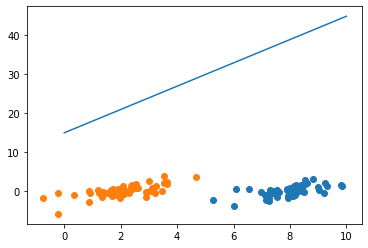

In [22]:
import matplotlib.pyplot as plt
dataArr, labelArr = svmMLiA.loadDataSet('testSet.txt')
dataMat = np.array(dataArr)
labelMat = np.array(labelArr)
plt.scatter(dataMat[labelMat==1,0], dataMat[labelMat==1,1])
plt.scatter(dataMat[labelMat==-1,0], dataMat[labelMat==-1,1])

#dd = dataMat[alphas>0&labelMat>=1]
w = (0.082216+3.507396)/(3.457096-4.658191)
print (w)
bb = b.getA()[0][0]
print (bb)
x = np.array([0, 10])
y = (-bb - x*w)
plt.plot(x, y)

plt.show()